# Manipulasi Vektor/Matriks

## Import libraries

In [0]:
import numpy as np
from numpy import matlib
import matplotlib.pyplot as plt

## a. Buat definisi Matriks M dan Vektor a, b, c. Salah satu package Python yang umum digunakan untuk permasalahan terkait aljabar linear seperti ini adalah Numpy. 

In [0]:
# initialize variables
M =  np.array([[1,2,3],[4,5,6],[7,8,9], [0,2,2]])
a = np. array([1,1,0])
b =  np.array([-1,2,5])
c = np.array([0, 2, 3, 2])


## b. Hitung dot product dari vektor a dan b. Simpan nilainya ke dalam variabel aDotb dan tampilkan nilainya ke layar. 

In [3]:
aDotb = np.dot(a, b)
print('aDotb = ' + str(aDotb))

aDotb = 1


## c. Hitung element-wise product dari vektor a dan b. Tampilkan hasilnya ke layar.

In [4]:
# change the shape of array to be 3 rows 1 column
a.shape = (3,1)
b.shape = (3,1)

# elementwise product
elementwise = (np.multiply(a,b)).T
print("Elementwise product = " + str(elementwise))


Elementwise product = [[-1  2  0]]


## d. Hitung (aT B)Ma. Tampilkan hasilnya di ke layar

In [5]:
a.shape = (3,1)
b.shape = (3,1)
result = np.dot(a.T, b) * np.dot(M, a)
print(result)

[[ 3]
 [ 9]
 [15]
 [ 2]]


## e. Tanpa menggunakan loop, hitung perkalian element-wise dari tiap baris M dengan a. Tampilkan hasilnya ke layar. Petunjuk: bisa menggunakan fungsi repmat(). 

In [6]:
newX = np.matlib.repmat(a.T, 4, 1)
y = np.multiply(newX, M)
print(y)

[[1 2 0]
 [4 5 0]
 [7 8 0]
 [0 2 0]]


## f. Tanpa menggunakan loop, urutkan semua nilai dari M yang baru (dari hasil e) terurut dari nilai terkecil ke terbesar lalu buat dalam grafik/plot.

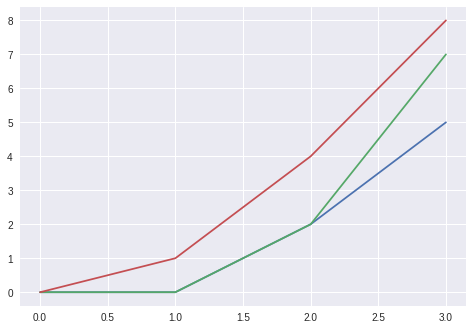

In [7]:
sortedMatrix = y.flatten()
sortedMatrix.sort()
sortedMatrix.shape = (y.shape[0], y.shape[1])
sortedMatrix

# plot the sortedMatrix
plt.plot(sortedMatrix)
plt.show()

# Basic Image Manipulation

## Import libraries

In [0]:
import numpy as np
import cv2
from skimage import io
import matplotlib.pyplot as plt
from scipy import misc

## a. Read in the images, image1.jpg and image2.jpg, as color images. 


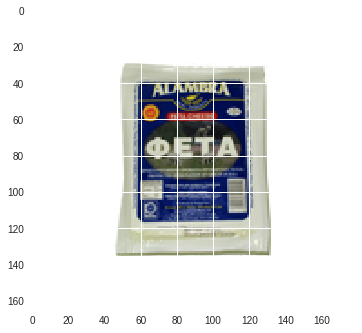

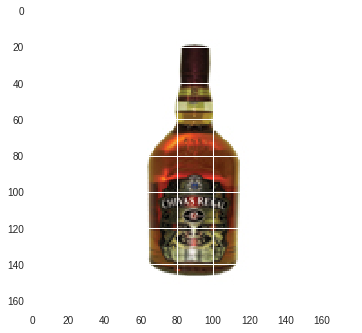

In [9]:
# read images
img1 = misc.imread('img1.jpg')
img2 = misc.imread('img2.jpg')

# display images
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()

## b. Convert the images to double precision and rescale them to stretch from minimum value 0 to maximum value 1. 


In [0]:
# convert the image
img1 = np.float64(misc.imread('img1.jpg', flatten = 1, mode='F'))
img2 = np.float64(misc.imread('img2.jpg', flatten = 1, mode='F'))

# initialize new variables
normalizeImg1 = np.zeros((165, 179))
normalizeImg2 = np.zeros((165, 179))

# normalize 
normalizeImg1= cv2.normalize(img1, normalizeImg1, 0, 1, cv2.NORM_MINMAX)
nnormalizeImg2 = cv2.normalize(img2, normalizeImg2, 0, 1, cv2.NORM_MINMAX)

## c. Add the images together and re-normalize them to have minimum value 0 and maximum value 1. Display this new image. 

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


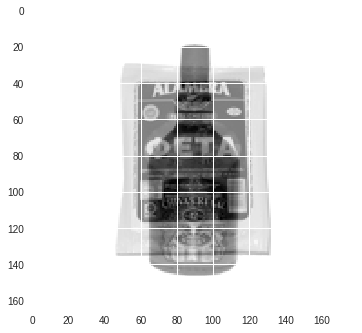

In [12]:
# add image together
combine = np.zeros((165, 179))
combine = cv2.normalize((normalizeImg1 + normalizeImg2), combine, 0, 1, cv2.NORM_MINMAX)

# saving the new image
io.imsave('added_images.jpg', combine)

# display the new image
plt.imshow(combine, cmap=plt.cm.gray)
plt.show()


## d. Create a new image such that the left half of the image is the left half of image1 and the right half of the image is the right half of image2. Display this new image. 


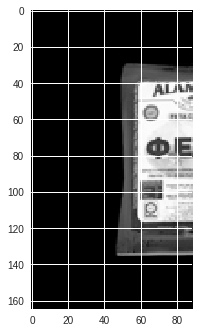

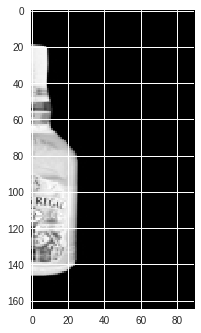

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


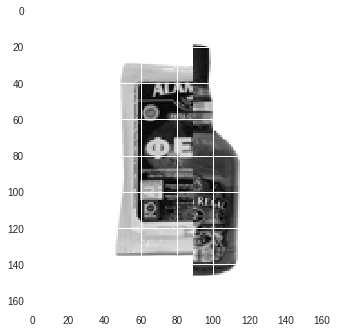

In [13]:
# crop the image
croppImg1 = normalizeImg1[0:165, 0:179//2]
croppImg2 = normalizeImg2[:, 179//2:]

# display crops
plt.imshow(croppImg1)
plt.show()
plt.imshow(croppImg2)
plt.show()

# saving the new image
newImage = np.concatenate((croppImg1, croppImg2), axis=1)
io.imsave('concate.jpg', newImage)

# display the new image
plt.imshow(newImage, cmap=plt.cm.gray)
plt.show()

## e. Using a for loop, create a new image such that every odd numbered row is the corresponding row from image1 and the every even row is the corresponding row from image2. (Hint: Remember that indices start at 0 and not 1 in Python). Display this new image.

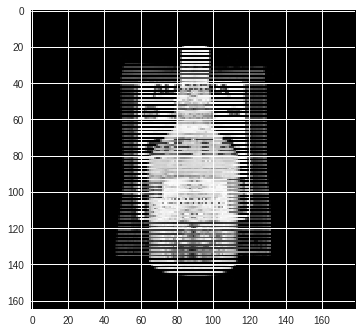

In [14]:
newImage = np.empty((165, 179))
for row in range(len(normalizeImg1)):
    if row % 2 == 1: #odd
        newImage[row] = normalizeImg1[row]

    else: #even
        newImage[row] = normalizeImg2[row]

plt.imshow(newImage)
plt.show()


## f. Accomplish the same task as part e without using a for-loop (the functions reshape and repmat may be helpful here). 


In [0]:
oddMatrix = normalizeImg1[1::2]
evenMatrix = normalizeImg2[::2]
newImg2 = np.empty((165, 179))
newImg2[1::2] = oddMatrix
newImg2[::2] = evenMatrix

## Convert the result from part f to a grayscale image. Display the grayscale image with a title 

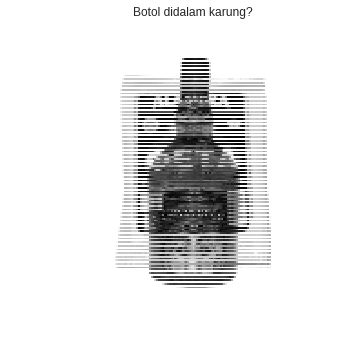

In [16]:
plt.imshow(newImg2, cmap=plt.cm.gray)
plt.title("Botol didalam karung?")
plt.axis('off')
plt.show()